In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [2]:
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_mask.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_mask.nc']


In [3]:
grid=nc.Dataset(nc_filename[0])
print grid

<type 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    dimensions(sizes): x(544), y(800), z(50), t(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 nav_lev(z), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int8 vmaskutil(t,y,x), int8 fmaskutil(t,y,x), float32 glamt(t,y,x), float32 glamu(t,y,x), float32 glamv(t,y,x), float32 glamf(t,y,x), float32 gphit(t,y,x), float32 gphiu(t,y,x), float32 gphiv(t,y,x), float32 gphif(t,y,x), float64 e1t(t,y,x), float64 e1u(t,y,x), float64 e1v(t,y,x), float64 e1f(t,y,x), float64 e2t(t,y,x), float64 e2u(t,y,x), float64 e2v(t,y,x), float64 e2f(t,y,x), float64 ff(t,y,x), int16 mbathy(t,y,x), float64 e3t(t,z,y,x), float64 e3u(t,z,y,x), float64 e3v(t,z,y,x), float64 e3w(t,z,y,x), float32 gdept(t,z,y,x), float32 gdepu(t,z,y,x), float32 gdepv(t,z,y,x), float32 gdepw(t,z,y,x), float64 gdept_0(

In [4]:
nav_lon=grid.variables['nav_lon'][:]
nav_lat=grid.variables['nav_lat'][:]
bathy=grid.variables['mbathy'][:]
tmask=grid.variables['tmask'][:]
umask=grid.variables['umask'][:]
vmask=grid.variables['vmask'][:]
fmask=grid.variables['fmask'][:]

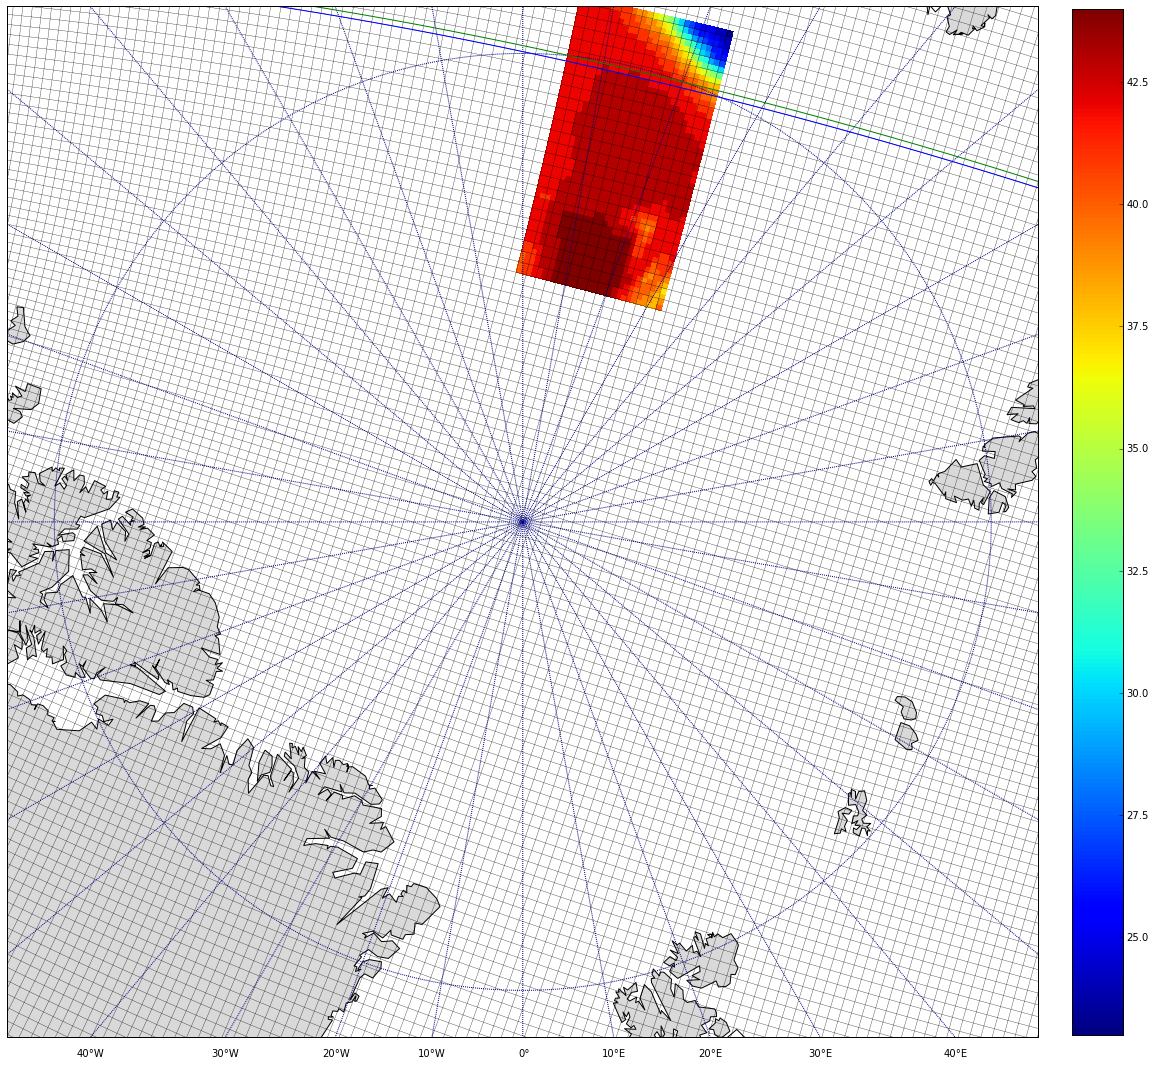

In [32]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],bathy[0,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()

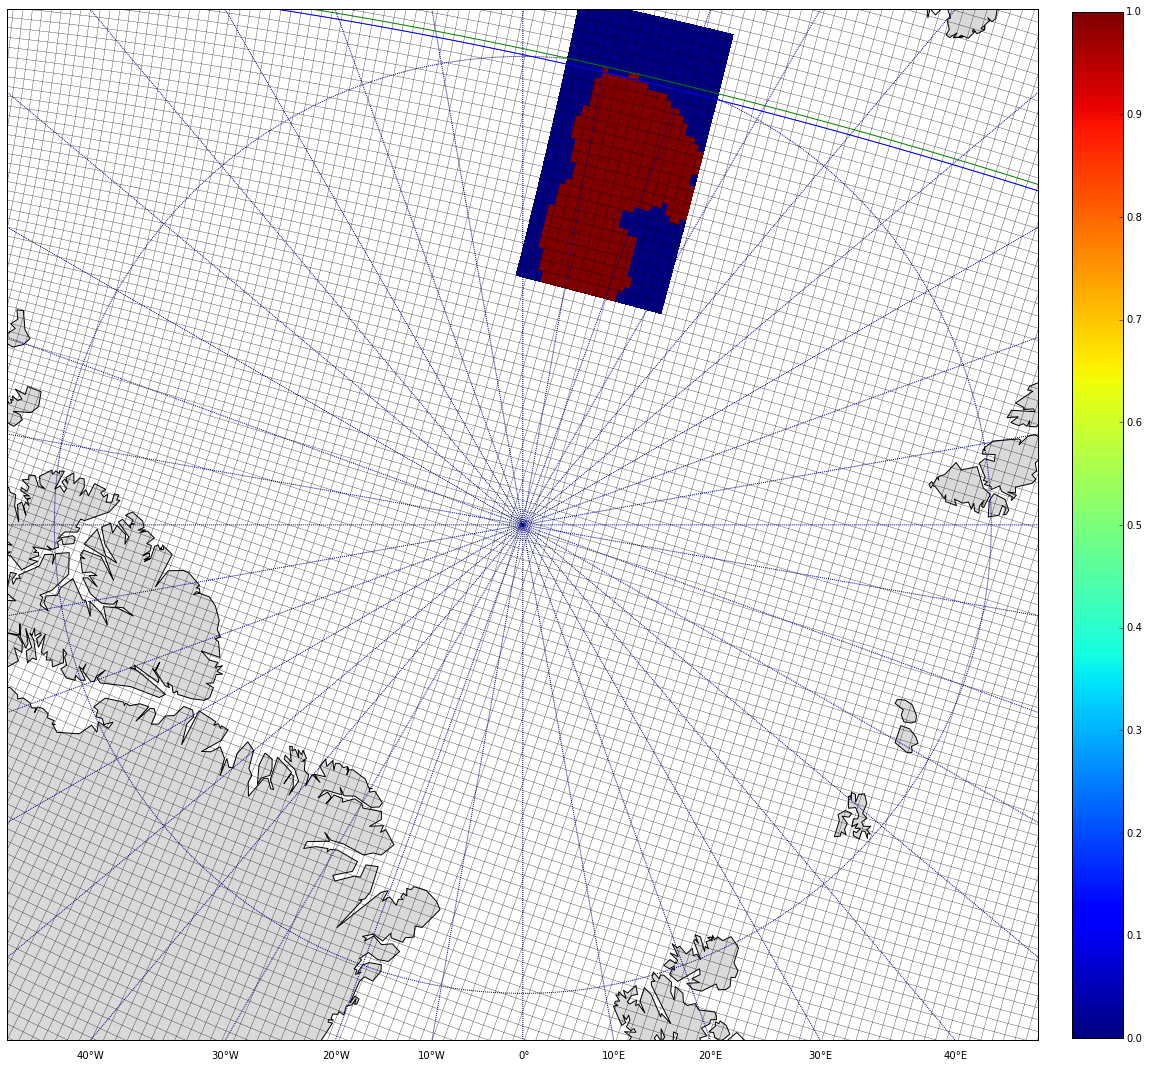

In [55]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],tmask[0,42,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()

In [40]:
print bathy[0,687,290:320]
print bathy[0,688,290:320]
print bathy[0,689,290:320]

[42 42 42 42 42 42 42 43 43 43 43 43 43 43 43 43 42 42 42 42 42 42 42 41 41
 41 40 40 39 39]
[42 42 42 42 42 42 42 43 42 42 42 42 43 43 42 42 42 42 42 42 42 42 41 41 41
 40 40 39 39 38]
[42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 41 41 41 40 40
 39 39 38 38 37]


In [48]:
#make a new array and change where layer=46 into 45 (in Canada Basin only).
bathy2=copy.copy(bathy)
#make a new array and change t/u/v/fmask (in Canada Basin only).
tmask2=copy.copy(tmask)
umask2=copy.copy(umask)
vmask2=copy.copy(vmask)
fmask2=copy.copy(fmask)

a=np.where(bathy[0,688,290:320]==bathy[0,688,290:320].max())
print len(a[0])

3


In [49]:
index1=688
index2=290
for i in range (len(a[0])):
    bathy2[0,688,a[0][i]+index2]=bathy[0,688,290:320].max()-1
    tmask2[0,bathy[0,688,290:320].max()-1,688,a[0][i]+index2]=0.
    umask2[0,bathy[0,688,290:320].max()-1,688,a[0][i]+index2]=0.
    vmask2[0,bathy[0,688,290:320].max()-1,688,a[0][i]+index2]=0.
    fmask2[0,bathy[0,688,290:320].max()-1,688,a[0][i]+index2]=0.

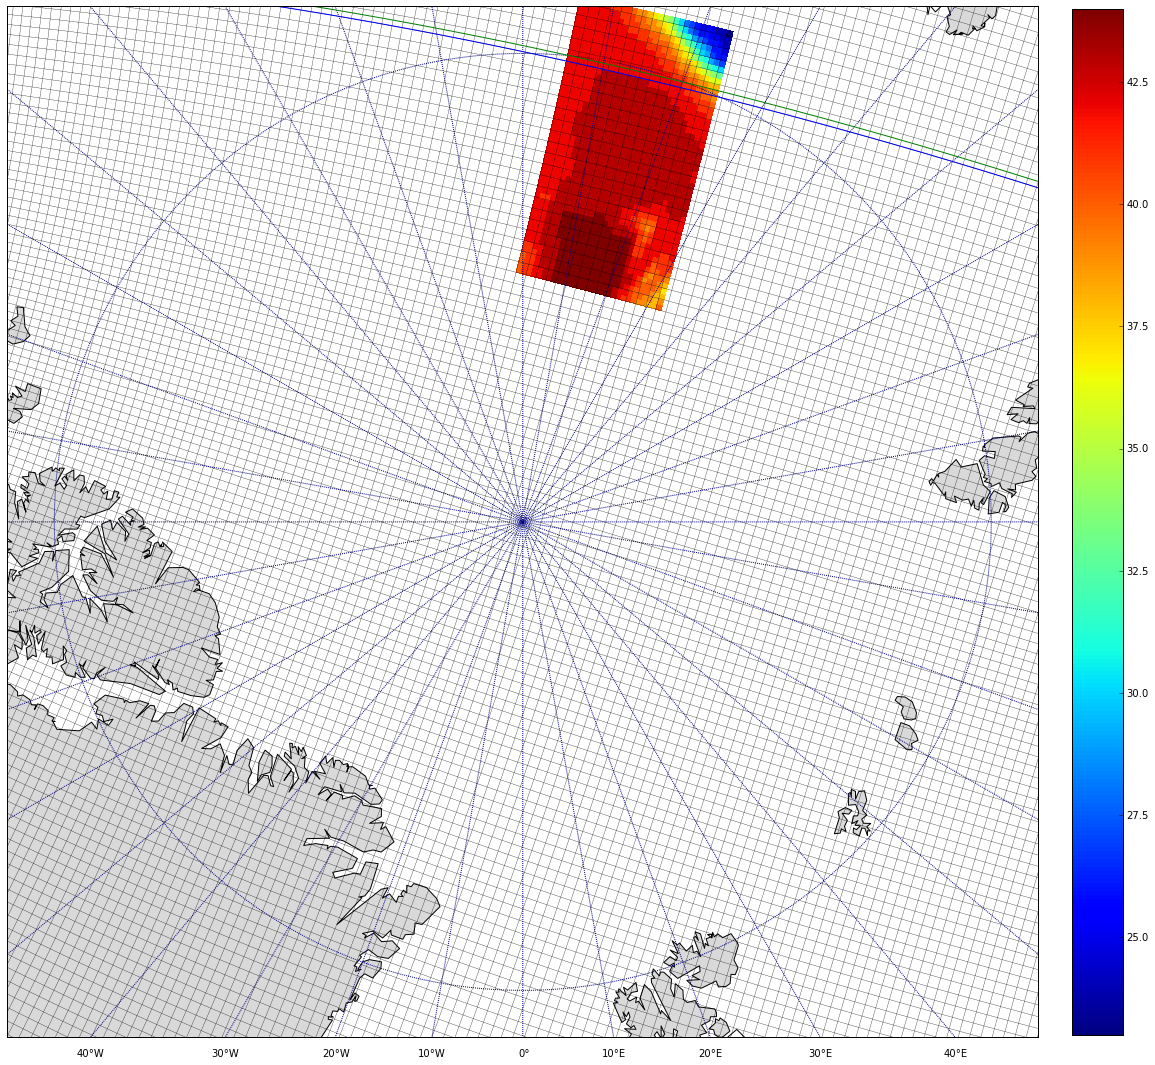

In [51]:
#plot new layers (Note that the 46 in south Canada Basin is gone)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],bathy2[0,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()

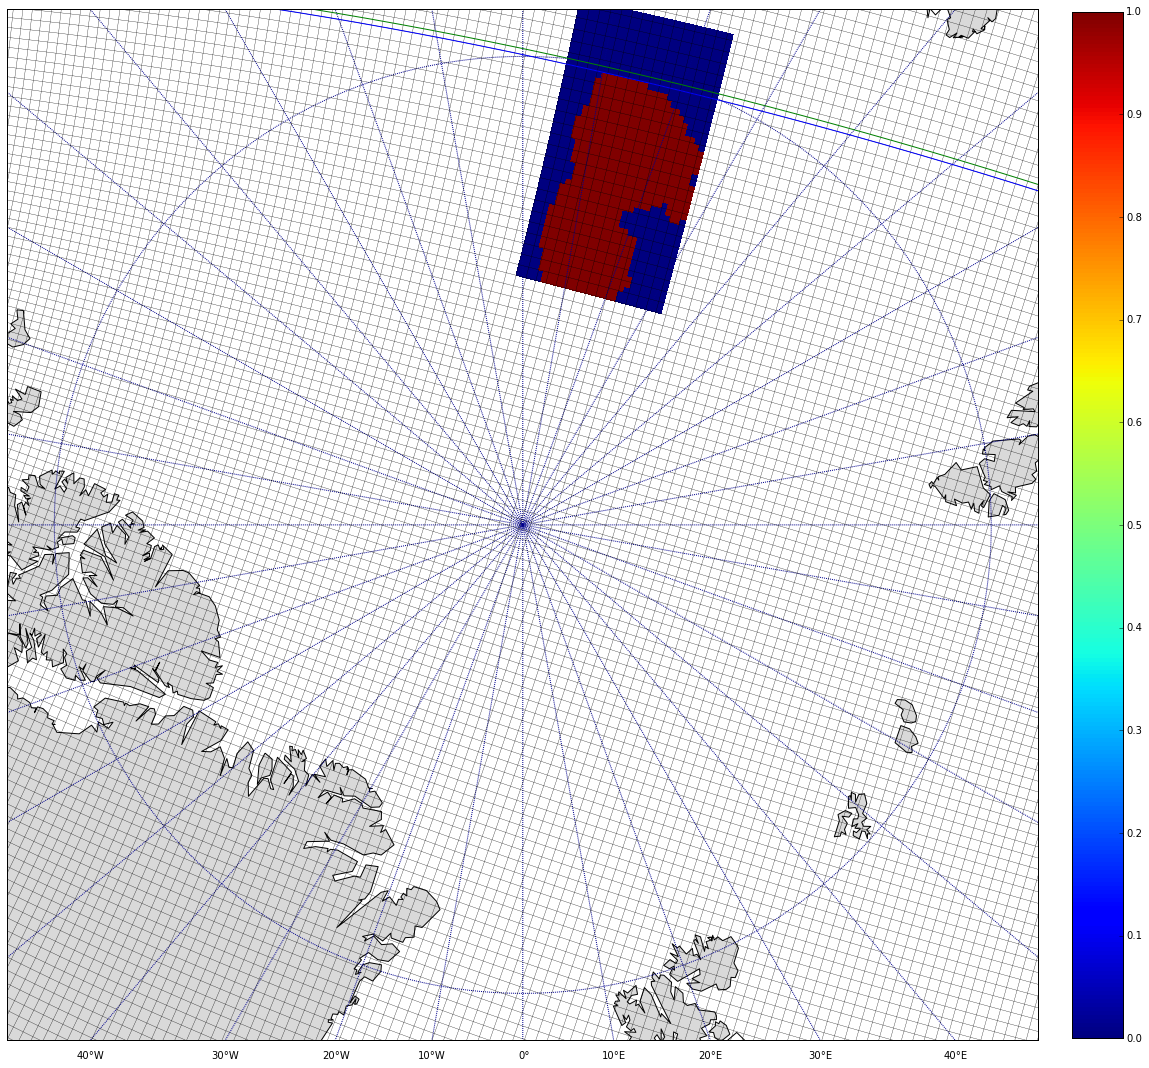

In [56]:
#print new tmask at the layer 42
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],tmask2[0,42,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()

In [57]:
#my magic function to rewrite the new bathy

In [58]:
#magic function to copy nc file!!!!

from netCDF4 import Dataset

#input file
dsin = Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_mask.nc")
#remove old file if it exists
#os.remove("crop.nc")
#output file
dsout = Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc", "w")

#Copy dimensions
for dname, the_dim in dsin.dimensions.iteritems():
    #print dname, len(the_dim)
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)


# Copy variables
for v_name, varin in dsin.variables.iteritems():
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    if v_name=='mbathy':
        outVar[:] = bathy2[:]
        print 'hi, my new bathy'
    elif v_name=='tmask':
        outVar[:] = tmask2[:]
        print 'hi, my new tmask'
    elif v_name=='umask':
        outVar[:] =umask2[:]
        print 'hi, my new umask'
    elif v_name=='vmask':
        outVar[:] =vmask2[:]
        print 'hi, my new vmask'
    elif v_name=='fmask':
        outVar[:] =fmask2[:]
        print 'hi, my new fmask'
    else:
        outVar[:] = varin[:]
    
# close the output file
dsout.close()

hi, my new tmask
hi, my new umask
hi, my new vmask
hi, my new fmask
hi, my new bathy


In [59]:
#test my magic function
gridnew=nc.Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc")
nav_lon=gridnew.variables['nav_lon'][:]
nav_lat=gridnew.variables['nav_lat'][:]
bathynew=gridnew.variables['mbathy'][:]
fmasknew=gridnew.variables['fmask'][:]

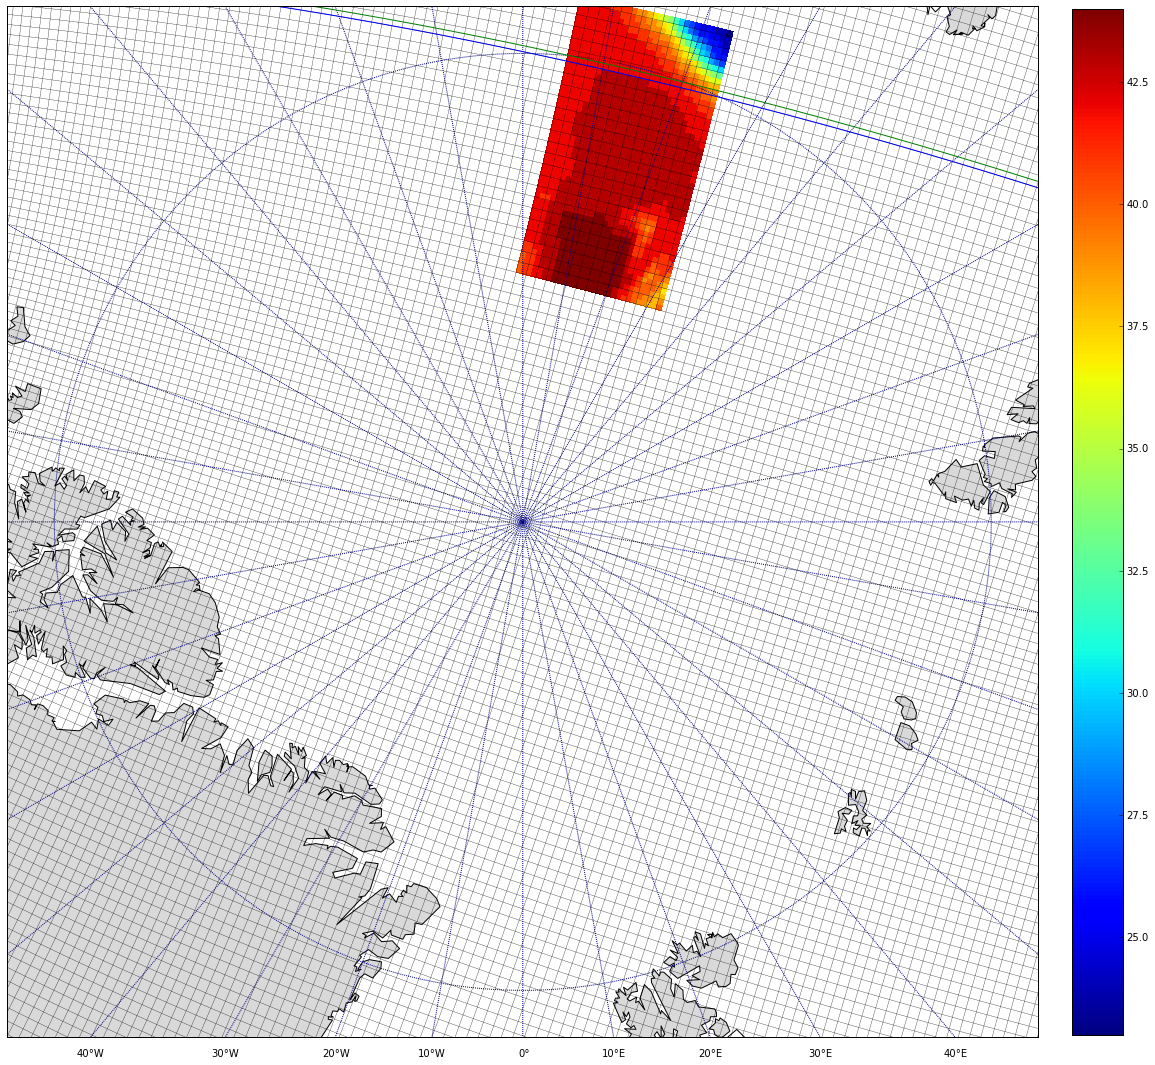

In [61]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],bathy2[0,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()

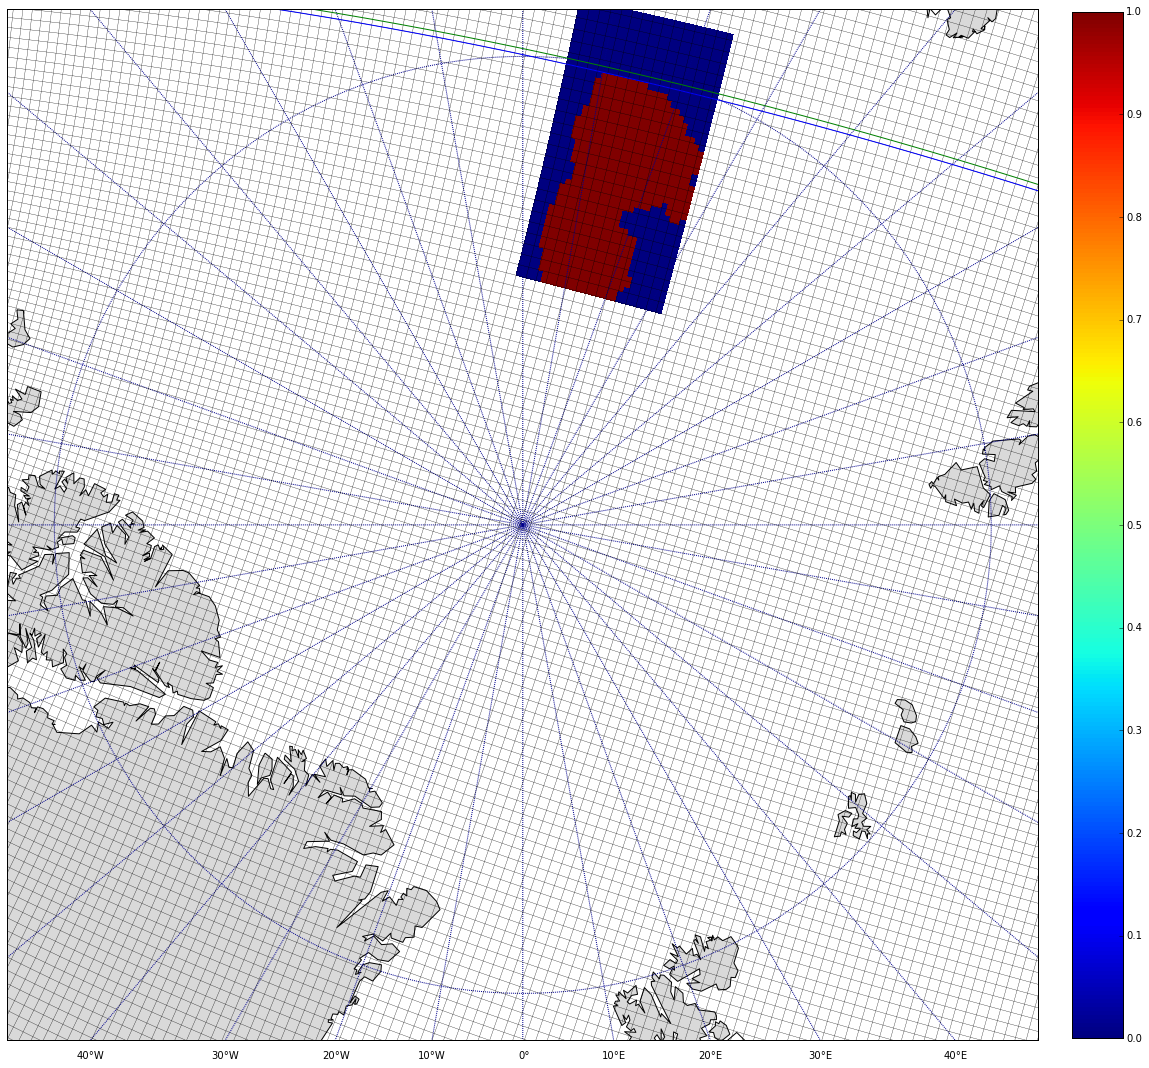

In [62]:
#print new tmask at the layer 42
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=79,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='black',linewidth=0.3)
m.plot(x_lon[688,:],y_lat[688,:])
m.plot(x_lon[689,:],y_lat[689,:])
m.pcolor(x_lon[650:700,290:320],y_lat[650:700,290:320],tmask2[0,42,650:700,290:320])
plt.colorbar(fraction=0.046,pad=0.03)
#m.scatter(x_lon[688,303],y_lat[688,303])
plt.show()